In [1]:
# %pip install regionmask

See https://regionmask.readthedocs.io/ for more details. There's probably a nicer way of creating masks for multiple regions at the same time.

In [2]:
import regionmask

In [3]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
from shapely.geometry import Polygon, Point

In [4]:
data = xr.DataArray(
    np.random.normal(size=(365, 180, 360)) ** 2,
    dims=("time", "lat", "lon"),
    coords={
        "time": np.arange(365),
        "lat": np.linspace(-90, 90, 181)[:-1],
        "lon": np.linspace(-180, 180, 361)[:-1],
    }
)
data

<xarray.DataArray (time: 365, lat: 180, lon: 360)>
array([[[4.65444616e-01, 4.62487201e-03, 1.01654998e+00, ...,
         4.65226343e-01, 6.25886771e-02, 7.71302495e-01],
        [4.78883682e+00, 2.49750680e+00, 5.47350281e-02, ...,
         4.48767439e-01, 2.81138932e+00, 2.91449889e-02],
        [1.65679359e+00, 4.40765378e-01, 7.66590717e-04, ...,
         2.64090377e+00, 2.82755032e+00, 3.18583877e-01],
        ...,
        [6.06432078e-02, 5.47502298e-03, 3.70366310e-02, ...,
         1.84985590e-02, 6.16204859e-02, 5.96784106e-01],
        [1.51585058e+00, 2.86046533e-03, 1.19182854e+00, ...,
         1.17808309e+00, 7.22916059e-01, 5.63310546e+00],
        [8.73441154e-02, 4.71987135e-01, 8.12771641e-01, ...,
         2.88644722e-01, 1.14747303e-03, 5.97062116e-01]],

       [[4.13820340e+00, 2.77816297e-01, 9.19010648e-02, ...,
         1.05061563e-01, 6.45536747e-01, 3.11630916e+00],
        [4.85693074e-02, 3.20725288e-03, 3.84736497e-03, ...,
         4.08062155e+00, 1.65299622e-04, 1.88484276e+00],
        [2.85365768e+00, 6.37406319e-01, 2.73485709e-01, ...,
         1.90449287e+00, 6.71743009e-01, 1.00069177e+00],
...
        [2.22270680e-01, 2.46873845e+00, 6.51867183e+00, ...,
         4.32968622e-01, 3.49790212e-01, 9.15476933e-01],
        [2.34432716e-01, 8.24998621e-01, 1.37555655e+00, ...,
         2.71127995e-03, 3.58093435e-04, 3.30476133e-05],
        [5.44132299e+00, 1.99428274e-01, 4.99737318e-01, ...,
         1.71176718e+00, 2.14390486e-01, 1.75830233e+00]],

       [[6.39044722e-01, 3.10918121e+00, 7.81390728e-01, ...,
         4.01769032e-01, 4.02962858e+00, 4.39927974e-01],
        [1.89069469e-03, 1.88860171e+00, 9.45335914e-01, ...,
         1.40468026e-01, 2.01488319e+00, 1.79425494e+00],
        [8.42662959e-03, 2.24697750e+00, 8.38086676e-01, ...,
         3.84450500e-01, 9.30837852e-01, 2.27640079e-03],
        ...,
        [1.53765612e+00, 1.36458007e+00, 9.93207986e-02, ...,
         8.01526567e-01, 1.07638320e+00, 2.66153965e-01],
        [5.50212507e-01, 3.12914462e-01, 2.90386789e-01, ...,
         1.90091643e-01, 1.71989566e-03, 2.30243131e-02],
        [4.28894791e-01, 2.46332220e-01, 1.49373370e+00, ...,
         4.17933391e-03, 5.05999170e-01, 2.75596900e+00]]])
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 8 ... 357 358 359 360 361 362 363 364
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 86.0 87.0 88.0 89.0
  * lon      (lon) float64 -180.0 -179.0 -178.0 -177.0 ... 177.0 178.0 179.0

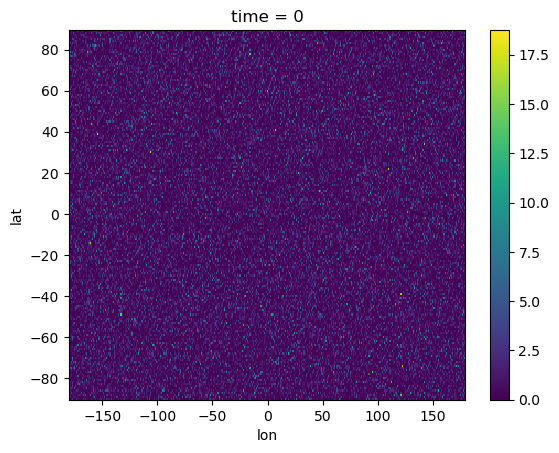

In [5]:
data.isel(time=0).plot()

In [6]:
lon_box_rect = (-50, 50)
lat_box_rect = (10, 30)

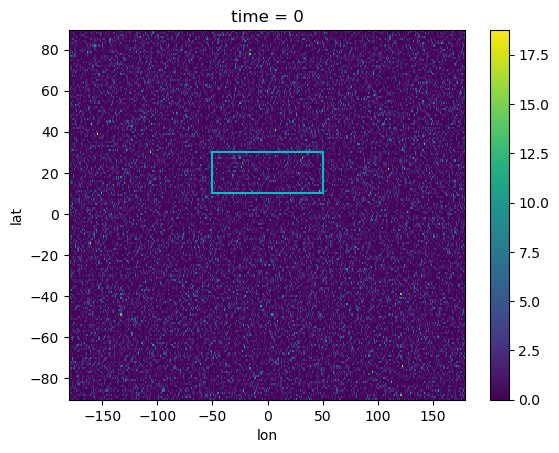

In [7]:
data.isel(time=0).plot()
plt.plot([lon_box_rect[0], lon_box_rect[0]], lat_box_rect, 'c-')
plt.plot([lon_box_rect[1], lon_box_rect[1]], lat_box_rect, 'c-')
plt.plot(lon_box_rect, [lat_box_rect[0], lat_box_rect[0]], 'c-')
plt.plot(lon_box_rect, [lat_box_rect[1], lat_box_rect[1]], 'c-')

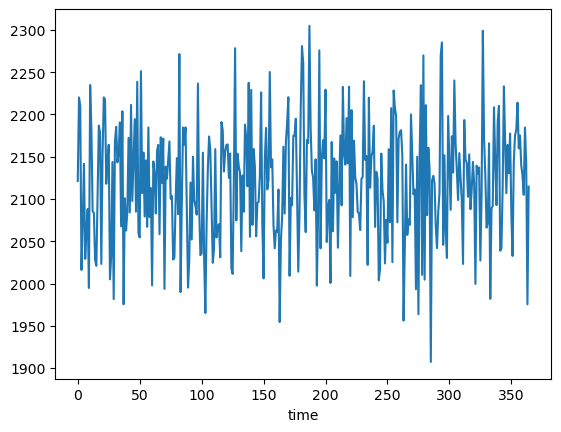

In [8]:
data.sel(
    lon=slice(lon_box_rect[0], lon_box_rect[1]),
    lat=slice(lat_box_rect[0], lat_box_rect[1]),
).sum(["lat", "lon"]).plot()

In [9]:
box_rect = [(-50, 10), (50, 10), (50, 30), (-50, 30)]
box_rect_poly = Polygon(box_rect)

POLYGON ((-50 10, 50 10, 50 30, -50 30, -50 10))


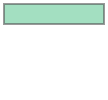

In [10]:
print(box_rect_poly)
display(box_rect_poly)

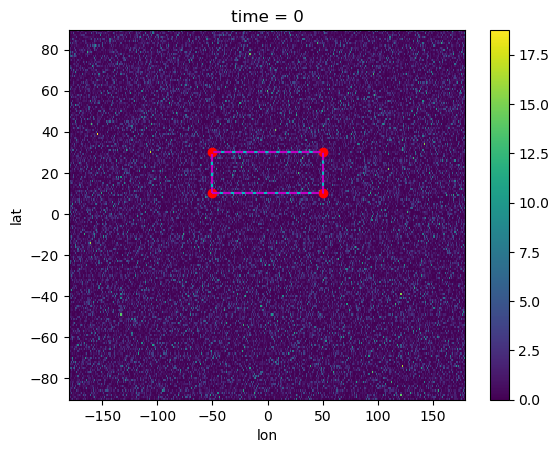

In [11]:
data.isel(time=0).plot()
plt.plot([lon_box_rect[0], lon_box_rect[0]], lat_box_rect, 'c-')
plt.plot([lon_box_rect[1], lon_box_rect[1]], lat_box_rect, 'c-')
plt.plot(lon_box_rect, [lat_box_rect[0], lat_box_rect[0]], 'c-')
plt.plot(lon_box_rect, [lat_box_rect[1], lat_box_rect[1]], 'c-')
plt.plot([br[0] for br in box_rect], [br[1] for br in box_rect], 'ro')
plt.plot(*box_rect_poly.boundary.xy, 'm--')

In [12]:
box_nonrect = [(-50, 10), (50, 10), (50, 30), (0, 50), (-50, 30)]
box_nonrect_poly = Polygon(box_nonrect)

POLYGON ((-50 10, 50 10, 50 30, 0 50, -50 30, -50 10))


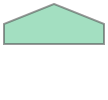

In [13]:
print(box_nonrect_poly)
display(box_nonrect_poly)

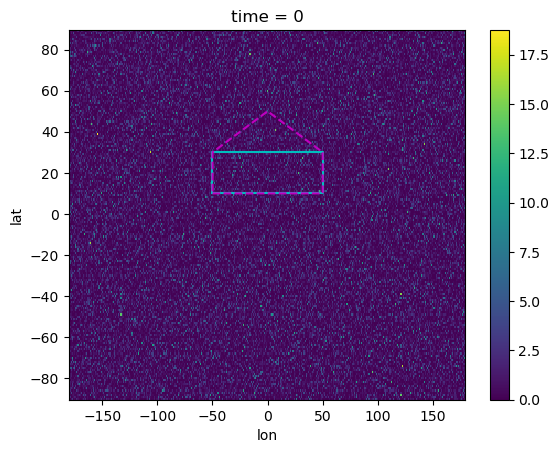

In [14]:
data.isel(time=0).plot()
plt.plot(*box_rect_poly.boundary.xy, 'c-')
plt.plot(*box_nonrect_poly.boundary.xy, 'm--')

In [15]:
lon = 10
lat = 35
print(box_nonrect_poly.contains(Point(lon, lat)))
print(box_rect_poly.contains(Point(lon, lat)))

True
False


In [16]:
reg_nonrect = regionmask.Regions([box_nonrect, box_rect], names=["nonrect", "rect"])
reg_nonrect

<regionmask.Regions 'unnamed'>
overlap:  None

Regions:
0 r0 nonrect
1 r1    rect

[2 regions]

/srv/conda/envs/notebook/lib/python3.11/site-packages/regionmask/core/mask.py:444: UserWarning: Detected overlapping regions. As of v0.11.0 these are correctly taken into account. Note, however, that a different mask is returned than with older versions of regionmask. To suppress this warning, set `overlap=True` (to restore the old, incorrect, behaviour, set `overlap=False`).
  warnings.warn(


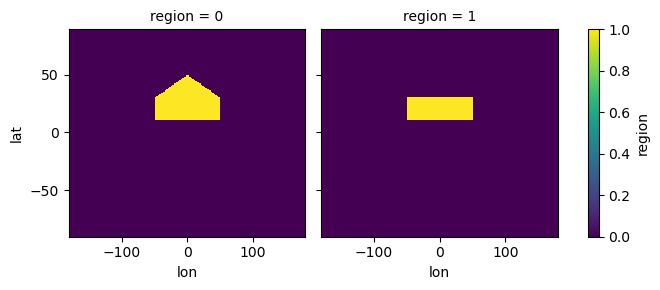

In [17]:
reg_nonrect.mask_3D(data.lon, data.lat).plot(col="region")

In [23]:
data_in_nonrect = data.where(reg_nonrect.mask_3D(data.lon, data.lat))
data_in_nonrect

/srv/conda/envs/notebook/lib/python3.11/site-packages/regionmask/core/mask.py:444: UserWarning: Detected overlapping regions. As of v0.11.0 these are correctly taken into account. Note, however, that a different mask is returned than with older versions of regionmask. To suppress this warning, set `overlap=True` (to restore the old, incorrect, behaviour, set `overlap=False`).
  warnings.warn(


<xarray.DataArray (time: 365, lat: 180, lon: 360, region: 2)>
array([[[[nan, nan],
         [nan, nan],
         [nan, nan],
         ...,
         [nan, nan],
         [nan, nan],
         [nan, nan]],

        [[nan, nan],
         [nan, nan],
         [nan, nan],
         ...,
         [nan, nan],
         [nan, nan],
         [nan, nan]],

        [[nan, nan],
         [nan, nan],
         [nan, nan],
         ...,
...
         ...,
         [nan, nan],
         [nan, nan],
         [nan, nan]],

        [[nan, nan],
         [nan, nan],
         [nan, nan],
         ...,
         [nan, nan],
         [nan, nan],
         [nan, nan]],

        [[nan, nan],
         [nan, nan],
         [nan, nan],
         ...,
         [nan, nan],
         [nan, nan],
         [nan, nan]]]])
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 8 ... 357 358 359 360 361 362 363 364
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 86.0 87.0 88.0 89.0
  * lon      (lon) float64 -180.0 -179.0 -178.0 -177.0 ... 177.0 178.0 179.0
  * region   (region) int64 0 1
    abbrevs  (region) <U2 'r0' 'r1'
    names    (region) <U7 'nonrect' 'rect'

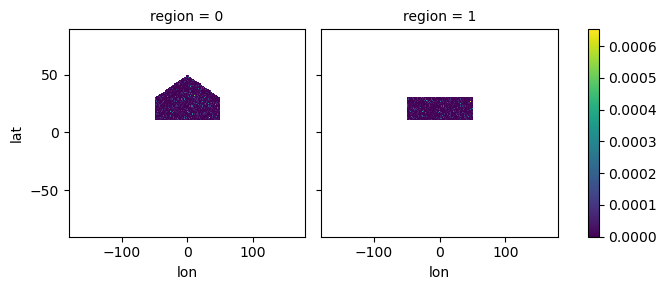

In [24]:
data_in_nonrect.min("time").plot(col="region")

In [25]:
# !curl -O https://zenodo.org/records/3634491/files/GYRE_5d_00010101_00011230_grid_T.nc

In [26]:
ds_T = xr.open_dataset("GYRE_5d_00010101_00011230_grid_T.nc", decode_cf=False)
ds_T

<xarray.Dataset>
Dimensions:            (y: 22, x: 32, deptht: 31, time_counter: 72, tbnds: 2)
Coordinates:
  * deptht             (deptht) float32 4.975 15.1 25.54 ... 4.15e+03 4.451e+03
  * time_counter       (time_counter) float64 2.16e+05 6.48e+05 ... 3.089e+07
Dimensions without coordinates: y, x, tbnds
Data variables: (12/23)
    nav_lon            (y, x) float32 ...
    nav_lat            (y, x) float32 ...
    time_counter_bnds  (time_counter, tbnds) float64 ...
    votemper           (time_counter, deptht, y, x) float32 ...
    vosaline           (time_counter, deptht, y, x) float32 ...
    sosstsst           (time_counter, y, x) float32 ...
    ...                 ...
    soicecov           (time_counter, y, x) float32 ...
    sowindsp           (time_counter, y, x) float32 ...
    sohefldp           (time_counter, y, x) float32 ...
    sowafldp           (time_counter, y, x) float32 ...
    sosafldp           (time_counter, y, x) float32 ...
    sobowlin           (y, x) float32 ...
Attributes:
    Conventions:  CF-1.1
    production:   An IPSL model
    TimeStamp:    27/09/2018 13:53:36 +0200
    file_name:    GYRE_5d_00010101_00011230_grid_T.nc

In [27]:
box_nonrect = [(-80, 30), (-70, 40), (-70, 20)]
box_nonrect_poly = Polygon(box_nonrect)

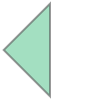

In [28]:
box_nonrect_poly

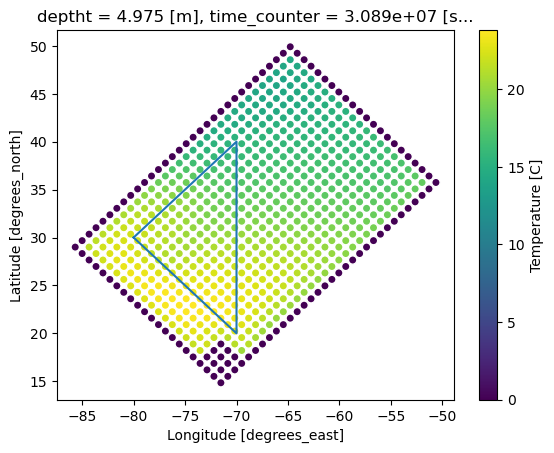

In [29]:
ds_T.isel(time_counter=-1, deptht=0).plot.scatter(x="nav_lon", y="nav_lat", hue="votemper");
plt.plot(*box_nonrect_poly.boundary.xy)

In [30]:
reg_tri = regionmask.Regions([box_nonrect_poly])
reg_tri

<regionmask.Regions 'unnamed'>
overlap:  None

Regions:
0 r0 Region0

[1 regions]

In [31]:
ds_T_reg = ds_T.where(reg_tri.mask_3D(ds_T.nav_lon, ds_T.nav_lat))
ds_T_reg

<xarray.Dataset>
Dimensions:            (y: 22, x: 32, region: 1, time_counter: 72, tbnds: 2,
                        deptht: 31)
Coordinates:
  * deptht             (deptht) float32 4.975 15.1 25.54 ... 4.15e+03 4.451e+03
  * time_counter       (time_counter) float64 2.16e+05 6.48e+05 ... 3.089e+07
  * region             (region) int64 0
    abbrevs            (region) <U2 'r0'
    names              (region) <U7 'Region0'
Dimensions without coordinates: y, x, tbnds
Data variables: (12/23)
    nav_lon            (y, x, region) float32 nan nan nan nan ... nan nan nan
    nav_lat            (y, x, region) float32 nan nan nan nan ... nan nan nan
    time_counter_bnds  (time_counter, tbnds, region, y, x) float64 nan ... nan
    votemper           (time_counter, deptht, y, x, region) float32 nan ... nan
    vosaline           (time_counter, deptht, y, x, region) float32 nan ... nan
    sosstsst           (time_counter, y, x, region) float32 nan nan ... nan nan
    ...                 ...
    soicecov           (time_counter, y, x, region) float32 nan nan ... nan nan
    sowindsp           (time_counter, y, x, region) float32 nan nan ... nan nan
    sohefldp           (time_counter, y, x, region) float32 nan nan ... nan nan
    sowafldp           (time_counter, y, x, region) float32 nan nan ... nan nan
    sosafldp           (time_counter, y, x, region) float32 nan nan ... nan nan
    sobowlin           (y, x, region) float32 nan nan nan nan ... nan nan nan
Attributes:
    Conventions:  CF-1.1
    production:   An IPSL model
    TimeStamp:    27/09/2018 13:53:36 +0200
    file_name:    GYRE_5d_00010101_00011230_grid_T.nc

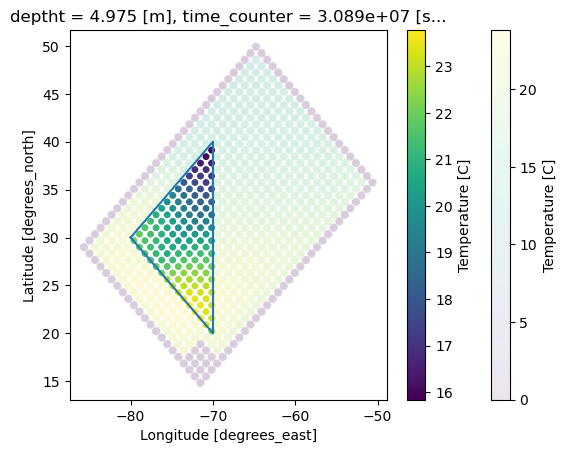

In [34]:
ds_T.isel(time_counter=-1, deptht=0).plot.scatter(x="nav_lon", y="nav_lat", hue="votemper", alpha=0.1);
ds_T_reg.isel(time_counter=-1, deptht=0).plot.scatter(x="nav_lon", y="nav_lat", hue="votemper");
plt.plot(*box_nonrect_poly.boundary.xy)

/srv/conda/envs/notebook/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


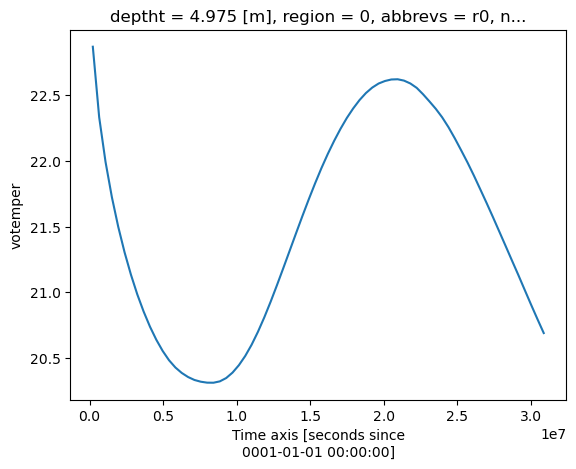

In [35]:
ds_T_reg.mean(["x", "y"]).isel(deptht=0).votemper.plot()